In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def changename(noos):
    if noos == 0:
        return 'NON-NOOS'
    else:
        return "NOOS"

df = pd.read_csv('seasonality data.csv', sep=';',decimal=',')
df = df.rename(columns={'SUM(od.gis1)': 'GIS'})

df['NOOS'] = df['NOOS'].apply(changename)
df.tail()

,NOOS,CalendarYear,CalendarMonth,CountryCode,IBrandLabel,ProductCategory,ProductSubCategory,GIS
49135,NOOS,2018,4,NL,VM,T-SHIRTS & TOPS,3/4 TOPS,432
49136,NOOS,2018,4,NL,VM,T-SHIRTS & TOPS,L/S TOPS,332
49137,NOOS,2018,4,NL,VM,T-SHIRTS & TOPS,S/L TOPS,333
49138,NOOS,2018,4,NL,VM,T-SHIRTS & TOPS,S/S TOPS,862
49139,NOOS,2018,4,NL,VM,TAILORING,BLAZERS,329


In [3]:
def millions(x,pos):
    #The two args are the value and tick position
    return '%1.1fK' %(x*1e-3)
formatter = FuncFormatter(millions)

## Top 5 categories per brand

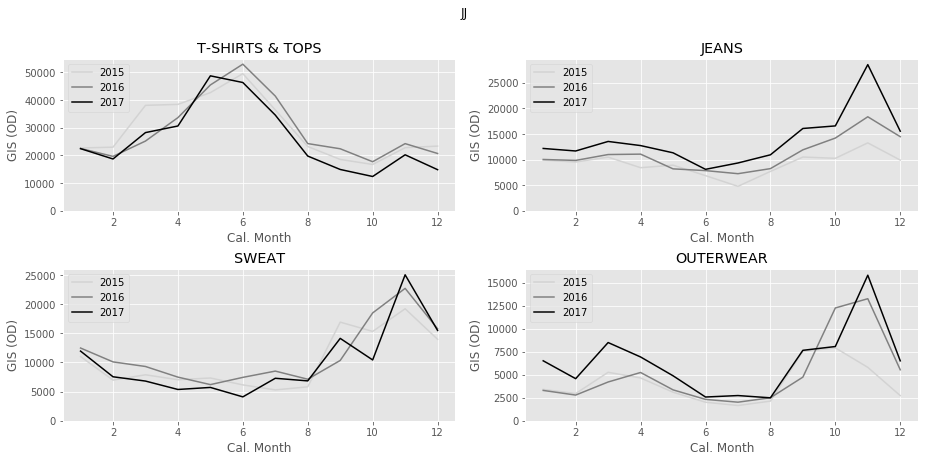

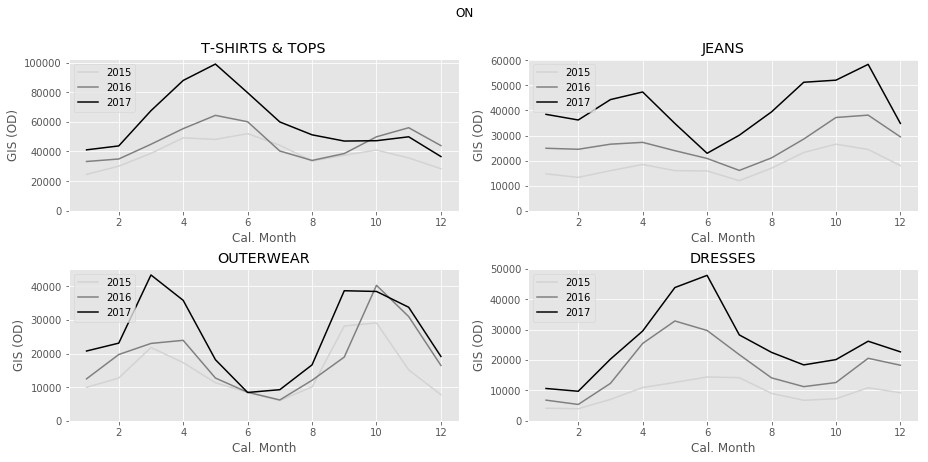

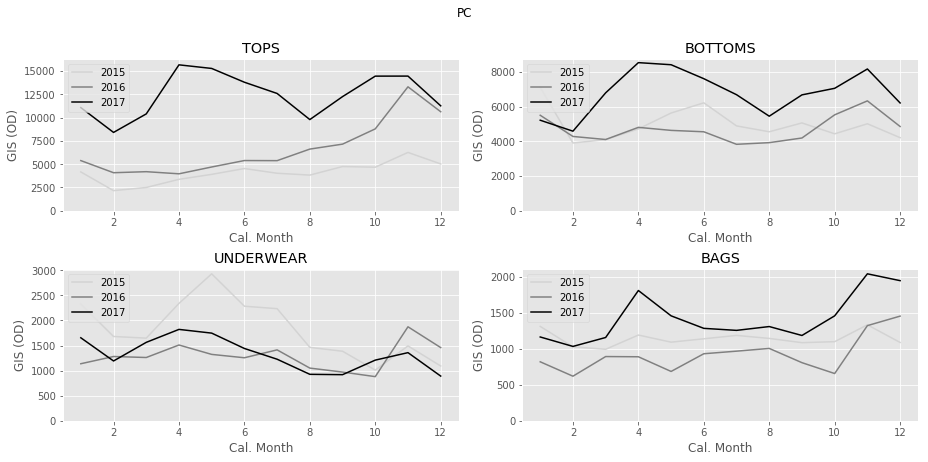

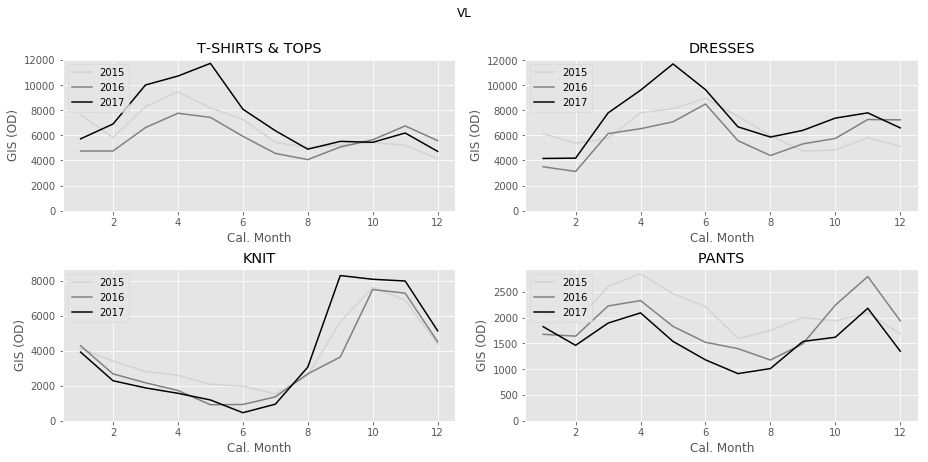

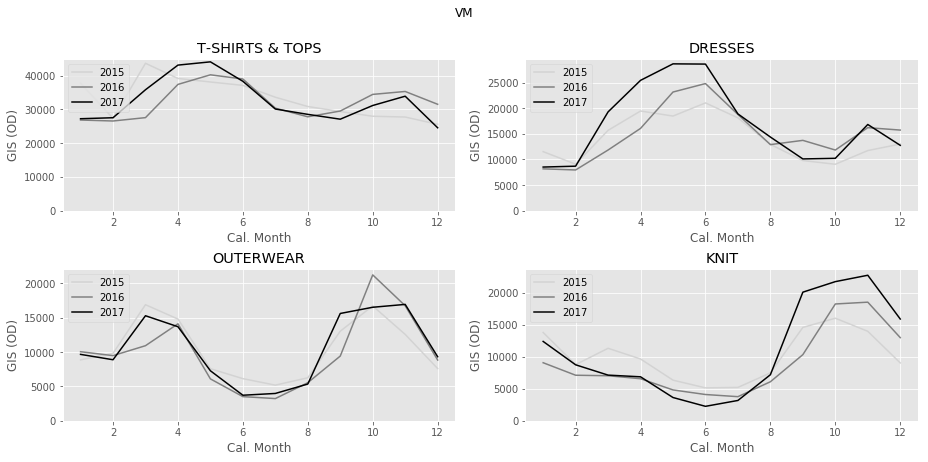

In [4]:
colors = ['lightgrey', 'grey', 'black']
brandlist = list(df.IBrandLabel.unique())
for brand in brandlist:
    df_brand = df[df.IBrandLabel == brand]
    catlist = list(df_brand.groupby('ProductCategory')['GIS'].sum().nlargest(4).index)
    fig = plt.figure(figsize=(13,9),facecolor='white')
    for i, cat in enumerate(catlist,1):
        ax = fig.add_subplot(3,2,i)
        df_cat = df_brand[df_brand.ProductCategory == cat].groupby(['CalendarYear','CalendarMonth'])['GIS'].sum()
        df_cat = df_cat.unstack('CalendarYear')
        x = df_cat.index
        for c, year in enumerate(df_cat.columns):
            if year != 2018:
                y = df_cat[year]
                plt.plot(x, y, label=year, color=colors[c])
        plt.legend(loc=2)
        plt.ylabel("GIS (OD)")
        plt.xlabel("Cal. Month")
        #ax.yaxis.set_major_formatter(formatter)
        plt.ylim(0)
        plt.title('%s' %cat)
        plt.tight_layout()
    fig.suptitle('%s' %brand)
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()
#     plt.savefig()
    

In [5]:
df_cat

CalendarYear,2015,2016,2017,2018
CalendarMonth,,,,
1,13779.0,9061.0,12383.0,12196.0
2,8765.0,7111.0,8738.0,8477.0
3,11315.0,7030.0,7128.0,6945.0
4,9647.0,6566.0,6864.0,5720.0
5,6342.0,4816.0,3632.0,NaN
6,5138.0,4102.0,2258.0,NaN
7,5211.0,3766.0,3174.0,NaN
8,7473.0,6094.0,7189.0,NaN
9,14569.0,10323.0,20071.0,NaN


## NOOS & NON-NOOS per (top 5) category 

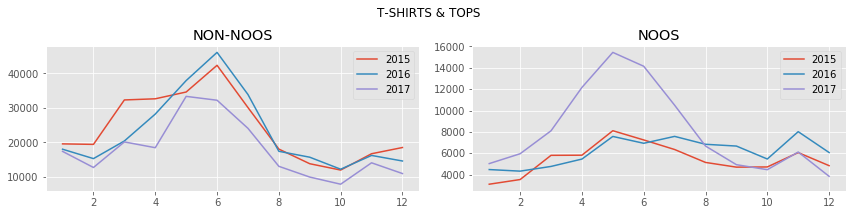

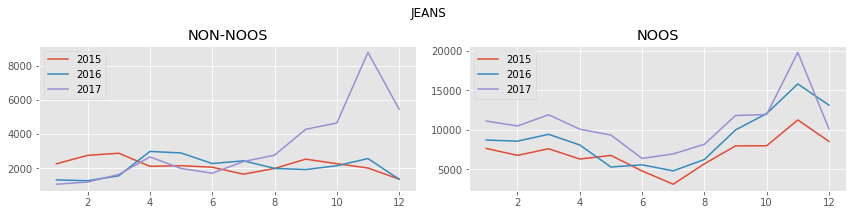

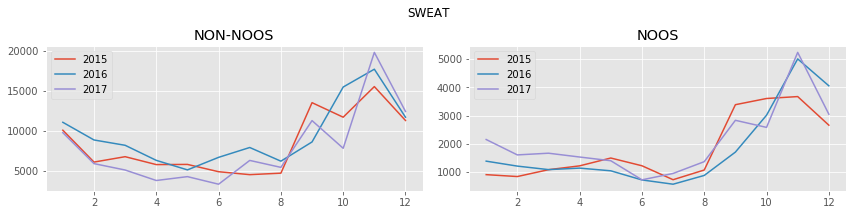

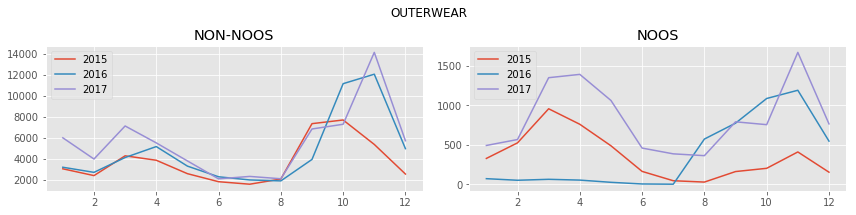

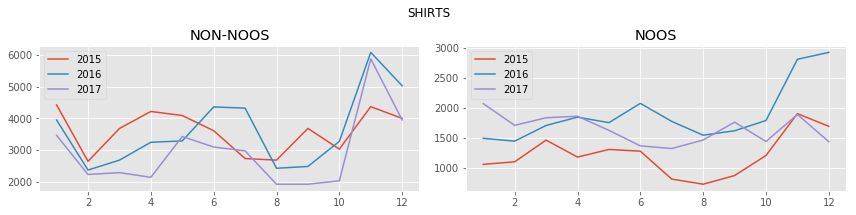

In [14]:
brand = 'JJ'
df_brand = df[df.IBrandLabel == brand]
catlist = list(df_brand.groupby('ProductCategory')['GIS'].sum().nlargest(5).index)

for cat in catlist:
    df_cat = df_brand[df_brand.ProductCategory == cat]
    fig = plt.figure(figsize=(12,3))
    noos_type = list(df.NOOS.unique())
    for i,noos in enumerate(noos_type,1):
        fig.add_subplot(1, 2, i)
        df_noos = df_cat[df_cat.NOOS == noos].groupby(['CalendarYear','CalendarMonth'])['GIS'].sum()
        df_noos = df_noos.unstack('CalendarYear')
        x = df_noos.index
        for year in df_noos.columns:
            if year!=2018:
                y = df_noos[year]
                plt.plot(x, y, label=year)
        plt.legend()
        plt.title('%s' %noos)
        plt.tight_layout()
        
    fig.suptitle('%s' %cat)
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()

## Top 2 subcats per (top 5) category

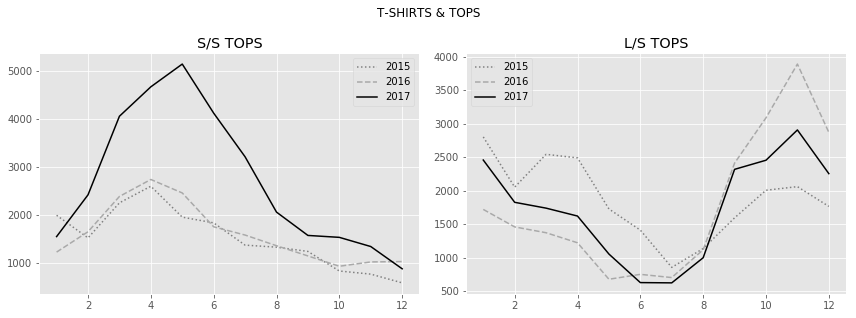

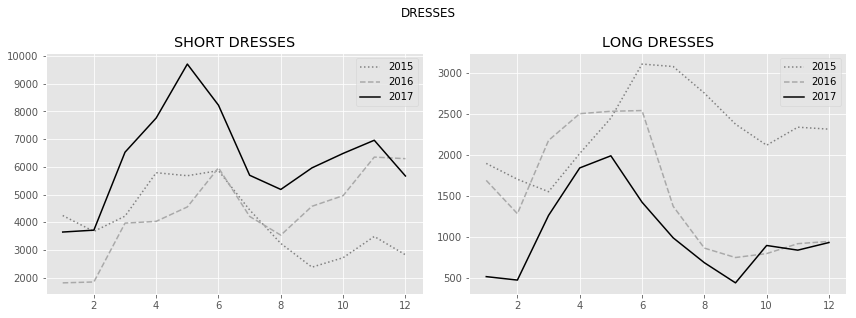

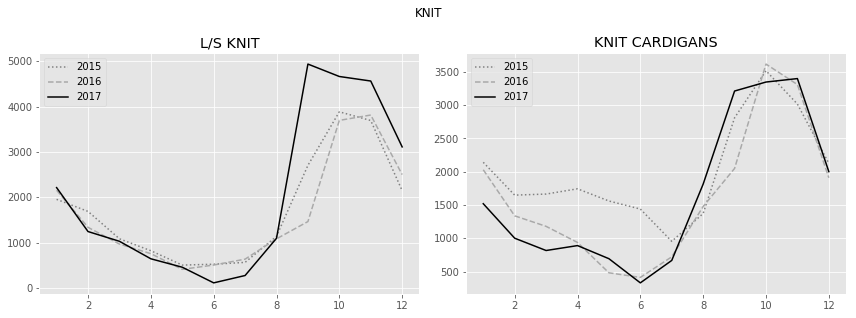

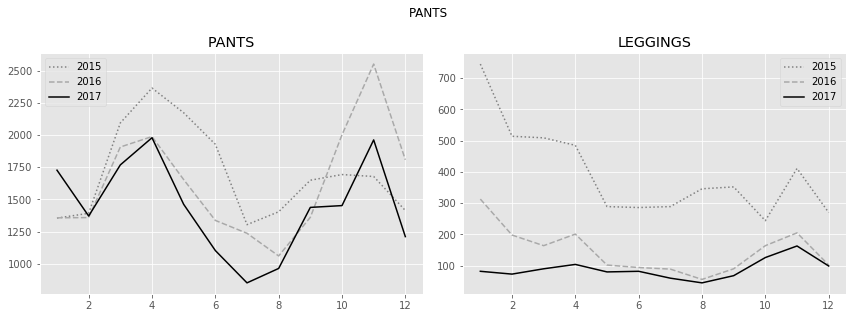

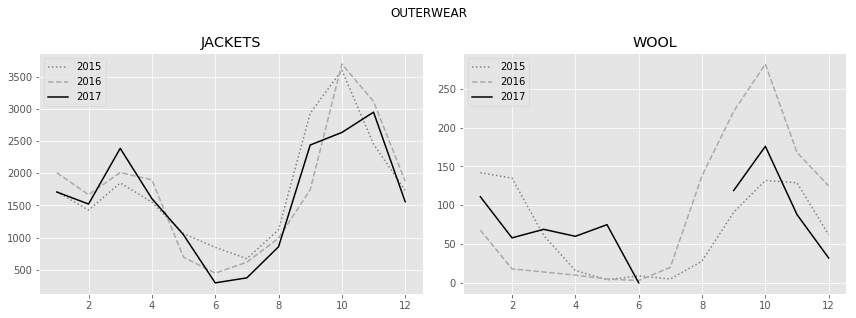

In [42]:
colors = ['grey', 'darkgrey', 'black']
style = [':','--','-']
brand = 'VL'
df_brand = df[df.IBrandLabel == brand]
catlist = list(df_brand.groupby('ProductCategory')['GIS'].sum().nlargest(5).index)

for cat in catlist:
    sublist = list(df_brand[df_brand.ProductCategory == cat].groupby('ProductSubCategory')['GIS'].sum().nlargest(2).index)
    fig = plt.figure(figsize=(12,8))
    for i,sub in enumerate(sublist,1):
        fig.add_subplot(2, 2, i)
        df_sub = df_brand[df_brand.ProductSubCategory==sub]
        df_sub_group = df_sub.groupby(['CalendarYear','CalendarMonth'])['GIS'].sum()
        df_sub_group = df_sub_group.unstack('CalendarYear')
        x = df_sub_group.index
        for c,year in enumerate(df_sub_group.columns):
            if year!=2018:
                y = df_sub_group[year]
                plt.plot(x, y, label=year,linestyle=style[c],color=colors[c])
                
        plt.legend()
        plt.title('%s' %sub)
        plt.tight_layout()
        
    fig.suptitle('%s' %cat)
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()